# Start of program

In [14]:
from functions import *
#from get_field import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

img = plt.imread('platform.png')

Input:

In [2]:
# Code should run for how many loops:
run_time = 100
# Between how many ped should be added per timestamp
ped_add_min = 0
ped_add_max = 4


In [3]:
ped_list = []
plotting_list = []

df = pd.DataFrame(columns = ['timestamp', 'ped', 'x', 'y'])
#df.set_index(['timestamp', 'ped'], inplace=True)
df

,timestamp,ped,x,y


In [4]:
for t in range(0, run_time):
    try:
        ped_list = generate_ped(ped_list, ped_add_min, ped_add_max)
        if t == 0:
            first = ped_list.copy()
        if t == int(run_time/2):
            half_way = ped_list.copy()
        field_list = get_field(ped_list)
        for ped in range(0, len(ped_list)):
            df = df.append({'timestamp' : t, 'ped': ped, 'x' : ped_list[ped][1][0], 'y' : ped_list[ped][1][1]}, ignore_index=True)
            probabilities = get_prob(ped_list, ped, field_list)
            decided_square = make_decision(probabilities)
            move_ped(ped_list, ped, decided_square)
            
    except:
        pass
        

In [5]:
unique_ped = np.unique(df.ped)
unique_ped

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55], dtype=object)

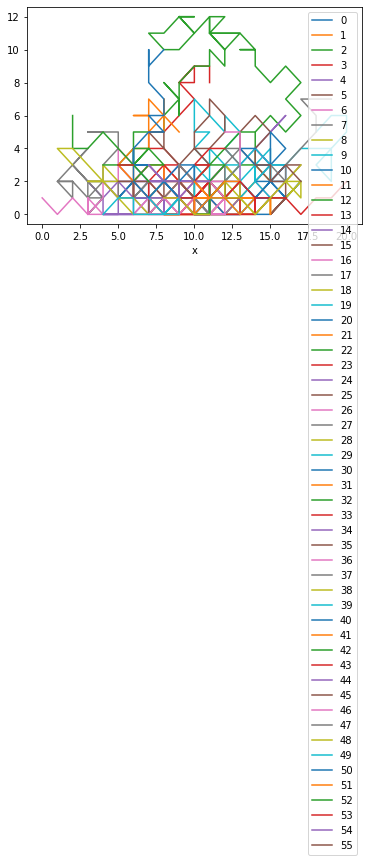

In [16]:
# plot a fugure:
fig = plt.figure()
#plot axes
ax  = fig.add_subplot(111)
#ax.imshow(img)
# Only plot the first 10 IDs of the unique lists
# What does the @ do in front of the i?
for i in unique_ped:
  df.query('ped == @i').plot('x', 'y', ax=ax, label=str(i))

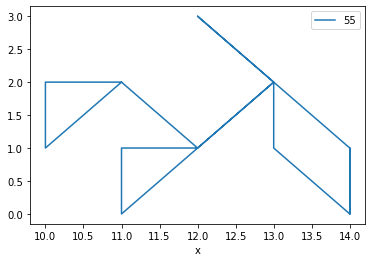

In [32]:
fig = plt.figure()
ax  = fig.add_subplot(111)
df.query('ped == 18').plot('x', 'y', ax=ax, label=str(i))

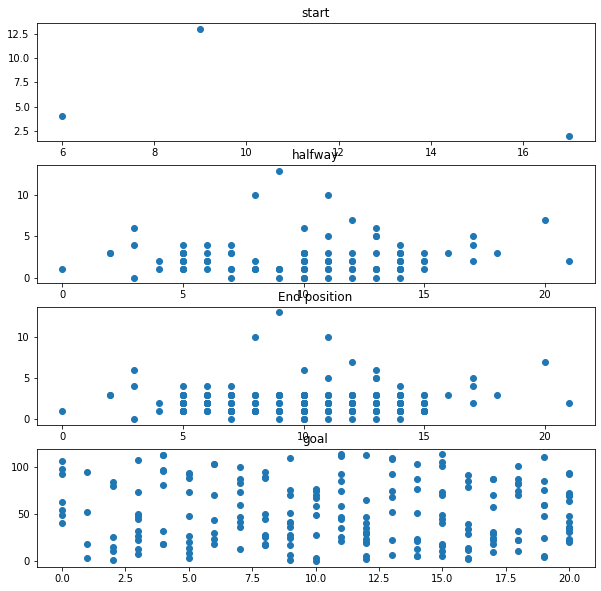

In [7]:
fig, ax = plt.subplots(4, figsize = (10,10))
array_first = np.array(first)
array_halfway = np.array(half_way)
array_end = np.array(ped_list)

ax[0].set_title('start')
ax[0].scatter(x=array_first[:,1,0], y=array_first[:,1,1])

ax[1].set_title('halfway')
ax[1].scatter(x=array_halfway[:,1,0], y=array_halfway[:,1,1])

ax[2].set_title('End position')
ax[2].scatter(x=array_end[:,1,0], y=array_end[:,1,1])

ax[3].set_title('goal')
ax[3].scatter(x=array_end[:,0,0], y=array_end[:,0,1])

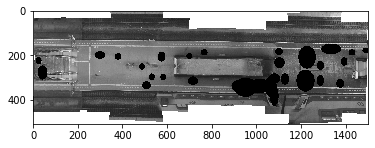

In [13]:
H, xedges, yedges = np.histogram2d(array_end[:,1,0], array_end[:,1,1], bins=(10))
H = H.T

fig, ax = plt.subplots()#figsize=(22, 3))
ax.imshow(H, cmap = 'Blues',norm = LogNorm())
ax.imshow(img)
#tight_layout()

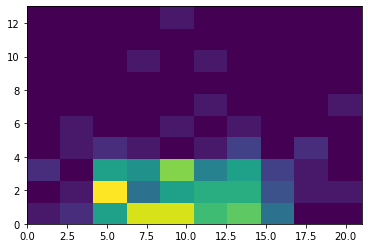

In [9]:
plt.hist2d(array_end[:,1,0], array_end[:,1,1], bins=10);

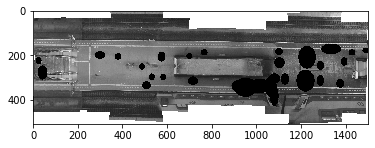

In [11]:
img = plt.imread('platform.png')
fig, ax = plt.subplots()
ax.imshow(img)